# Final Project

# A. Introduction

Bagian ini berisi deskripsi dari project dan library yang digunakan.

## A1. Project Description

by Handoko Pramulyo | Batch : FTDS-014

Title of the Project : **Elevating sales performance through predictive customer segmentation**

From a marketing perspective, it makes perfect sense to put in the effort to understand the characteristics and preferences of your best customers and keep sustaining your business. In this project, we predict customer segmentation and its actionable insight to push your marketing personalized programs at their best for the customer and boost your sales performance.

**Data Description** : Data yang digunakan adalah data sales retail online suatu perusahaan international yang berbasis di UK Inggris (A real online retail transaction data set of two years) dengan beragam produk hadiah unik, rumahan, furniture, tools, dan masih banyak lagi. Dataset terdiri dari beberapa kolom, seperti nomor invoice, tanggal invoice (range in 01/12/2009 sd 09/12/2011), nama barang, jumlah barang, harga barang, nama customer, serta lokasi customer. Adapun kebanyakan dari customer toko ini adalah glosir. Data-data ini akan kita proses lebih lanjut melalui RFM analysis dengan segmentasi-nya menggunakan model KMeans.

**Objective** : `Segmentasi customer in UK dan action promo apa yang sebaiknya dilakukan based on RFM`

**Dataset link** : https://www.kaggle.com/datasets/mashlyn/online-retail-ii-uci?select=online_retail_II.csv

**Deployment link** : https://customer-segmentation-uk.herokuapp.com

**Acknowledgements ----------------------**

- Chen, D. Sain, S.L., and Guo, K. (2012), Data mining for the online retail industry: A case study of RFM model-based customer segmentation using data mining, Journal of Database Marketing and Customer Strategy Management, Vol. 19, No. 3, pp. 197-208.
- Chen, D., Guo, K. and Ubakanma, G. (2015), Predicting customer profitability over time based on RFM time series, International Journal of Business Forecasting and Marketing Intelligence, Vol. 2, No. 1, pp.1-18.
- Chen, D., Guo, K., and Li, Bo (2019), Predicting Customer Profitability Dynamically over Time: An Experimental Comparative Study, 24th Iberoamerican Congress on Pattern Recognition (CIARP 2019), Havana, Cuba, 28-31 Oct, 2019.
- Laha Ale, Ning Zhang, Huici Wu, Dajiang Chen, and Tao Han, Online Proactive Caching in Mobile Edge Computing Using Bidirectional Deep Recurrent Neural Network, IEEE Internet of Things Journal, Vol. 6, Issue 3, pp. 5520-5530, 2019.
- Rina Singh, Jeffrey A. Graves, Douglas A. Talbert, William Eberle, Prefix and Suffix Sequential Pattern Mining, Industrial Conference on Data Mining 2018: Advances in Data Mining. Applications and Theoretical Aspects, pp. 309-324. 2018.

**-----------------------------------------**

## A2. Libraries

In [227]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import style
import squarify
import warnings
import datetime as dt
from scipy import stats
from feature_engine.outliers import Winsorizer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import pickle

# Define plot style
plt.style.use('bmh') #('ggplot')

Pada case Machine Learning ini, new library yang akan digunakan adalah scikit-learn (Machine Learning library in Python), library yang dedicated dibuat untuk Machine Learning. Simple and efficient tools for predictive data analysis, Accessible to everybody, and reusable in various contexts, Built on NumPy, SciPy, and matplotlib, Open source, dan sekaligus commercially usable. OK, lets proceed to the next part.

# B. Data Loading & Converting

Bagian berisi proses loading data, cek valid atau tidaknya data yang akan digunakan, serta konversi dataset dalam format RFM.

## B1. Data Loading

Pada bagian ini, kita akan coba isi dengan proses penyiapan data (pd read) sebelum dilakukan eksplorasi data lebih lanjut (atau yang biasa disebut dengan EDA). Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom (opsional), melihat gambaran umum dari data, mengecek ukuran dataset, dll.

In [228]:
# Load Dataset 
df = pd.read_csv('online_retail.csv') # Read CSV file
# data = pd.read_excel('online_retail_simple.xlsx', index_col=None, header=None) # # Read Excel file
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [229]:
df.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France
1067370,581587,POST,POSTAGE,1,2011-12-09 12:50:00,18.00,12680.0,France


In [230]:
# Show shape info of the dataset
df.shape

(1067371, 8)

Data observasi OKE (lebih dari 50 jumlah observasi --> based on sclearn recommendation) dengan jumlah feature yang proporsional, maka yang bisa kita artikan bahwa model yang akan dibuat 'most likely' low possibility untuk overfit (due to low variance which is good. ```Additional conclusion based on least square``` Jennifer Zhao in medium.com). **So now we can learn that we have TON of data (MS Excel cant handle TON of data like this).**

In [231]:
# Duplicate Dataset
data = df.copy()

In [232]:
# Check Dataset (looking up for missing value and understanding the dataset Dtype)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


Data type terdiri dari object, int64, dan float64. Terdapat null data pada `Description` dan `Customer ID`!

## B2. Data validation

### - Data Check (from invalid price, quantity, nulled data)

Let's see deeper with the data! Untuk beberapa case dataset, sering kali ditemukan nilai value yang tidak semestinya digunakan pada analisis. Seperti nilai frekuensi sales yang minus, atau harga product yang minus, dll. Demikian, pengecekan value tersebut perlu dilakukan --> drop value tersebut untuk clean dataset.

In [233]:
# Detect Price blow 0
data.loc[(data.Price<0)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom
825444,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
825445,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


Ternyata terdapat beberapa data Price dengan nilai negative! Price dengan value negative sangat tidak common. Row ini perlu kita drop karena nilai price tersebut hanya adjustment accounting dari toko online (seperti Adjust bad debt), bukan real sales (do not represent actual sales).

In [234]:
# Detect Quantity blow 0
data.loc[(data.Quantity<0)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
...,...,...,...,...,...,...,...,...
1065910,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
1067002,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
1067176,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
1067177,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


Nilai Quantity negative pada dasarnya juga tidak common, kecuali jika angka tersebut merepresentasikan product return atau cancelled by customer --> **Lets drop the data**

In [235]:
# Show nulled data in Description column
data[pd.isnull(data['Description'])]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.0,NaN,United Kingdom
3114,489655,20683,NaN,-44,2009-12-01 17:26:00,0.0,NaN,United Kingdom
3161,489659,21350,NaN,230,2009-12-01 17:39:00,0.0,NaN,United Kingdom
3731,489781,84292,NaN,17,2009-12-02 11:45:00,0.0,NaN,United Kingdom
4296,489806,18010,NaN,-770,2009-12-02 12:42:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
1060783,581199,84581,NaN,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom
1060787,581203,23406,NaN,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom
1060793,581209,21620,NaN,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom
1062442,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom


Terdapat nama product, atau Description, dengan value NaN --> **Lets drop the data**

In [236]:
# Show nulled data in Customer ID column
data[pd.isnull(data['Customer ID'])]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
1066997,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
1066998,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
1066999,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
1067000,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


Terdapat Customer ID NaN --> **Lets drop the data**

### - Drop invalid data

In [237]:
# Print shape of data raw
print('Shape before :', data.shape)

# Remove negative value of Price
data = data[data.Price > 0]
# Remove negative value of Quantity
data = data[data.Quantity > 0]
# Remove nulled data in Description column
data = data[pd.notnull(data['Description'])]
# Remove nulled data in CustomerID column
data = data[pd.notnull(data['Customer ID'])]

# Print shape of data after cleaning process
print('Shape after :', data.shape)

Shape before : (1067371, 8)
Shape after : (805549, 8)


In [238]:
print('sum of dropped data :', (100 - (805549/1067371)*100), '%')

sum of dropped data : 24.52961528840487 %


In [239]:
# Recheck nulled data in dataset
data.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

Now, all data has been cleaned up! No more Nulled or NaN data!

### - Define Dataset Location & Add Total Price Column

In [240]:
# Show value frequency of Country
data_country = pd.DataFrame(data.Country.value_counts())
# Show top 10 frequency
data_country = data_country.head(10)
data_country.T

,United Kingdom,Germany,EIRE,France,Netherlands,Spain,Belgium,Switzerland,Portugal,Australia
Country,725250,16694,15743,13812,5088,3719,3068,3011,2446,1812


Dari data tersebut, dapat terlihat bahwa jumlah data dari United Kingdom adalah yang terbanyak. Mengingat segmentasi customer sangat dipengaruhi oleh lokasi (geografi), maka pada case ini, dataset UK atau Inggris saja yang akan digunakan.

In [241]:
# Define new dataset only for UK
data_UK = data[data.Country == 'United Kingdom']

# Create new columns of Total price
warnings.filterwarnings("ignore") # Ignore warning
data_UK['TotalPrice'] = data_UK['Quantity']*data_UK['Price']
data_UK.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


**Valid Dataset UK only ready!** --> `data_UK` will be used for EDA of Original dataset.

## B3. Converting dataset into RFM table

In [242]:
# Define date scheme (cut of date!)
NOW = dt.date(2011,12,9)

# Create new colums for new date format
data_UK['date'] = pd.DatetimeIndex(data_UK.InvoiceDate).date

In [243]:
# Create Recency columns (define as Last_Purchase_Date) groupby Customer ID
data_UK_recency = data_UK.groupby(['Customer ID'], as_index=False)['date'].max()
data_UK_recency.columns = ['Customer ID','Last_Purchase_Date']

# Conversion Last_Purchase_Date columns into recency
data_UK_recency['Recency'] = data_UK_recency.Last_Purchase_Date.apply(lambda x:(NOW - x).days)
data_UK_recency.drop(columns=['Last_Purchase_Date'],inplace=True)

# Create Frequency and Magnitude Columns
data_UK_freq_mag = data_UK.groupby('Customer ID').agg({'Invoice'   : lambda x:len(x),
                                               'TotalPrice': lambda x:x.sum()})
data_UK_freq_mag.rename(columns = {'Invoice' :'Frequency', 'TotalPrice':'Monetary'}, inplace= True)

# Merge Recency, Frequency, and Magnitude Columns
RFM_UK = data_UK_recency.merge(data_UK_freq_mag, left_on='Customer ID', right_on='Customer ID')

In [244]:
# Checking up dataframe of RFM UK
RFM_UK.head()

,Customer ID,Recency,Frequency,Monetary
0,12346.0,325,34,77556.46
1,12608.0,404,16,415.79
2,12745.0,486,22,723.85
3,12746.0,540,17,254.55
4,12747.0,2,257,9276.54


**RFM dataset is created!** --> `RFM_UK` will be used for EDA of RFM dataset.

# C. Exploratory Data Analysis (EDA)

Bagian ini berisi penjelasan dari EDA dataset original (`data_UK`) dan dataset dengan format RFM (`RFM_UK`)

## C1. EDA of Original Dataset

Let's see deeper about our dataset!

In [245]:
# Show data_UK dataset
data_UK.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice,date
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,2009-12-01
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009-12-01
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009-12-01
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,2009-12-01
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,2009-12-01


In [246]:
# Show value frequency of Invoice, top x frequency
data_Invoice = pd.DataFrame(data.Invoice.value_counts()).head(20)
# Show value frequency of Invoice, top x frequency
data_Description = pd.DataFrame(data.Description.value_counts()).head(3)
# Show value frequency of Invoice, top x frequency
data_StockCode = pd.DataFrame(data.StockCode.value_counts()).head(15)
# Show value frequency of Invoice, top x frequency
data_CustomerID = pd.DataFrame(data['Customer ID'].value_counts()).head(10)
# Show value Total Price vs date
data_date_TotalPrice = pd.DataFrame(data_UK.groupby('date')['TotalPrice'].sum())

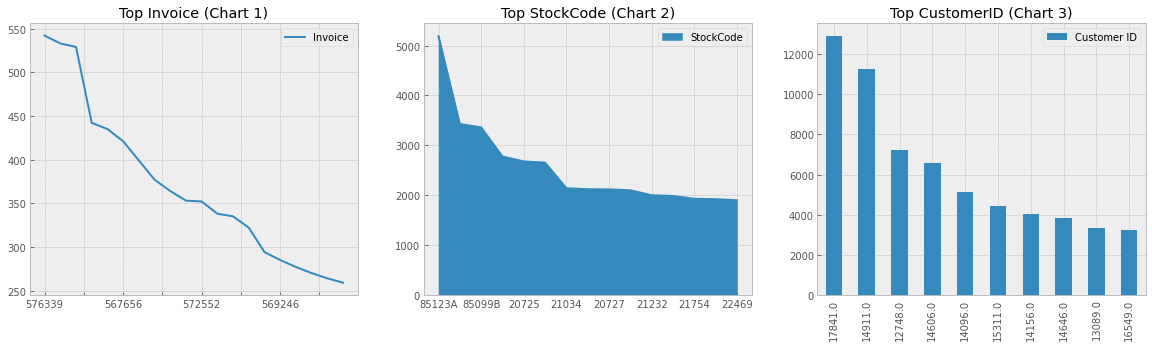

In [247]:
# Plot chart
fig, ax = plt.subplots(1,3, figsize=(20,5))

data_Invoice.plot(kind='line', ax=ax[0])
ax[0].set_title('Top Invoice (Chart 1)')

data_StockCode.plot(kind='area', ax=ax[1])
ax[1].set_title('Top StockCode (Chart 2)')

data_CustomerID.plot(kind='bar', ax=ax[2])
ax[2].set_title('Top CustomerID (Chart 3)')

plt.show()

In [248]:
## A few syntax for looking up deeper about the dataset (stat desc)
# data.loc[data['Invoice'] == '576339'].groupby('InvoiceDate').sum()
# data.loc[data['StockCode'] == '85123A'].groupby('Invoice').sum()
# data.loc[data['Description'] == 'WHITE HANGING HEART T-LIGHT HOLDER'].groupby('Invoice').sum()
# data.loc[data['Customer ID'] == 17841.0]
# data.loc[data['Customer ID'] == 17841.0].groupby('InvoiceDate').sum()

**On Chart 1**, it can be seen that there was an invoice transaction of 576339, with a very large amount in terms of amount, and this was done by one buyer of course (because the invoice represents a transaction by one buyer on the same day). The customer with this invoice transaction is likely a large wholesaler, although the amount is not large, the types of goods they buy are very diverse (invoice data: 2011-11-14, Quantity: 2175, Price: 3802.3, Cust ID: 7640032).

As for **chart 2**, it can be seen that the number of stock with the most purchases is the stock product with numbers 85123A, 85099B (WHITE HANGING HEART T-LIGHT HOLDER, a kind of love-shaped table decoration art merchandise which is very pretty, and REGENCY CAKESTAND 3 TIER or a kind of stacked plate for a unique cake container with a beautiful design, etc.). These products have been purchased for more than 3.5K to 5K in just 2 years (2 years dataset time range), an extraordinary number when compared to the average overall product with a total sales volume of 2K.

In **Chart 3**, it can be seen that the customer with ID 17841.0 is the customer with the most transactions compared to all other customers (almost 13K, in terms of the total quantity of all invoices made on different days ~ 211 invoices), or at least they always make product purchases at retail stores once every 3 to 4 days.

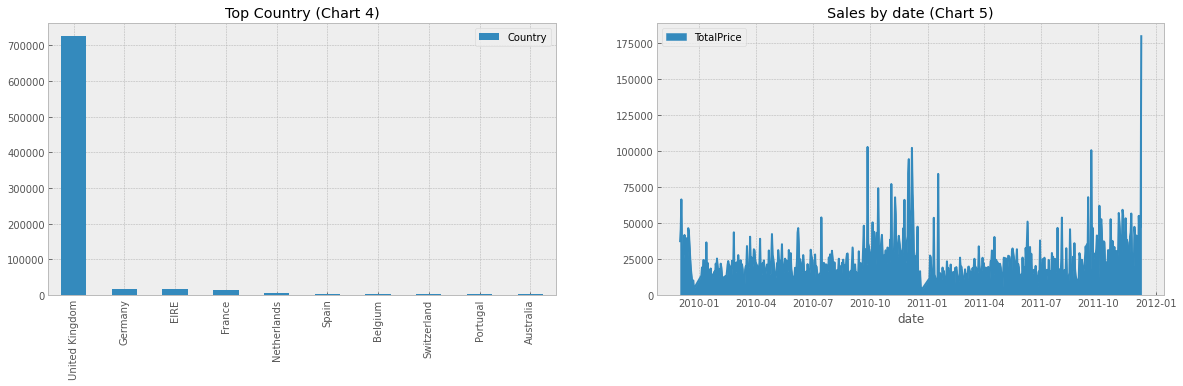

In [249]:
# Plot chart
fig, ax = plt.subplots(1,2, figsize=(20,5))

data_country.plot(kind='bar', ax=ax[0])
ax[0].set_title('Top Country (Chart 4)')

data_date_TotalPrice.plot(kind='area', ax=ax[1])
ax[1].set_title('Sales by date (Chart 5)')

# set the spacing between subplots
plt.subplots_adjust(hspace=0.6)

plt.show()

As previously discussed, **Chart 4** shows that this online retail store sells its products almost all over the world, with the majority of its customers domiciled in the UK or England, the second in Germany, followed by EIRE (Ireland), France, and so on. However, it can be seen that the UK GAP with other countries in terms of the number of transactions is very different (UK majority ~70% of sales transactions). Therefore, based on several sources, we chose the UK as a study case because customer segmentation also needs to be divided by geography (source: ocbcnisp.com, Market Segmentation: "How to Do It and How to Profit from It" by Malcolm McDonald), and the UK dominates the overall dataset.

As for **Chart 5**, it can be seen that sales are not smooth (spike, valley, etc.). However, overall sales cycle patterns can be seen at several moments throughout the dataset year, namely from 2010 to the end of 2011. There is an increase in sales at the end of the year, namely the moment when UK residents celebrate Christmas and New Year which makes buying and selling transactions in the UK move faster and more often than during other months. Sales fell slightly before and after Christmas, or during Q1 and Q3 because almost every country and world organization were in a state of planning and evaluation. UK residents are mostly saving to prepare their savings for the new year and see what the economic conditions are like in Q2, thus sales at this time are down, slightly to a moderate amount.

## C2. EDA of RFM Dataset

In [250]:
# Show RFM_UK dataset
RFM_UK.head()

,Customer ID,Recency,Frequency,Monetary
0,12346.0,325,34,77556.46
1,12608.0,404,16,415.79
2,12745.0,486,22,723.85
3,12746.0,540,17,254.55
4,12747.0,2,257,9276.54


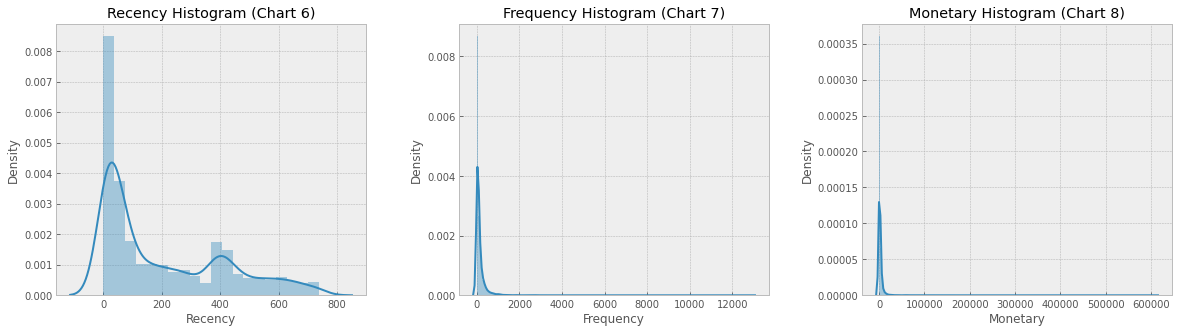

In [251]:
# Create Histogram and Scatter Plot
plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1), sns.distplot(RFM_UK['Recency'], bins=20, kde=True), plt.title('Recency Histogram (Chart 6)')
plt.subplot(1, 3, 2), sns.distplot(RFM_UK['Frequency'], bins=200, kde=True), plt.title('Frequency Histogram (Chart 7)')
plt.subplot(1, 3, 3), sns.distplot(RFM_UK['Monetary'], bins=300, kde=True), plt.title('Monetary Histogram (Chart 8)')

# set the spacing between subplots
plt.subplots_adjust(wspace=0.3)

plt.show()

In [252]:
## Descibe dataframe of RFM describe
# RFM_UK.describe()

Charts 6 to 8 are the result of converting raw datasets to RFM tables. It can be seen in **Chart 6** that most of the recency of last purchase customers is in the range of 0 to 100 (or about 1 to 3 months), and from the distribution point of view, the data is very right skewed, which means that the recency value is close to 0 which is much higher than that of the data distribution. with recency > 100. In fact, this condition is a plus and a minus from a retail store perspective. The first, is because the customer is quite recent in buying the product at the store which is good, but the second is that the one who bought the recent product is a new customer (potential but might be a risk at giving a bad rating without proper care).

In the next chart, **chart 7**, it can be seen that there are several customers with wholesaler transactions whose character is to buy goods very often, wholesalers, wholesalers, retailers, and the like but with a small amount of money and will sell the goods they buy. buy for resale as an agent or distributor at a better price (detected as outliers in frequency, but not in monetary).

As for **chart 8**, it can be seen that there are several customers with a fantastic amount of monetary (~600K with an average monetary of other customers of 2K), even though the distribution of monetary data shows that the majority of customers are more in numbers. 0 to 0.3K only for 2 years of the dataset.

# D. Data Preprocessing

Bagian ini berisi proses preparation of RFM dataset, log transformation, dan handling outliers-nya (karena karakter dari dataset tidak terdistribusi normal serta model segmentasi yang akan digunakana adalah K-Means, maka outliers handling perlu dilakukan). **Notes: di mulai pada bagian D ini, semua perhitungan akan menggunakan RFM dataset.**

## D1. Data Preparation (Main & Inference Data)

In [253]:
# Create copy of RFM dataset 
data_rfm = RFM_UK.copy()

In [254]:
# Membuat dataset inference dari dataset master
# Angka 10 tuk define jumlah observasi inference
# Random_state untuk define formula pemilihan data secara random yet wont change
data_rfm_inf = data_rfm.sample(10, random_state=23)
# Membuat dataset train dan test (exlude inference)
data_rfm = data_rfm.drop(data_rfm_inf.index)
# Reset Index --> rekomen untuk dilakukan after berhasil dilakukan split antara data train_test dan inference
data_rfm.reset_index(drop=True, inplace=True) 
data_rfm_inf.reset_index(drop=True, inplace=True)

In [255]:
# Show data rfm tanpa inf
data_rfm.head()

,Customer ID,Recency,Frequency,Monetary
0,12346.0,325,34,77556.46
1,12608.0,404,16,415.79
2,12745.0,486,22,723.85
3,12746.0,540,17,254.55
4,12747.0,2,257,9276.54


In [256]:
# Inference dataset is ready!
data_rfm_inf.head()

,Customer ID,Recency,Frequency,Monetary
0,13037.0,138,232,3914.95
1,17004.0,46,70,2425.16
2,12928.0,35,179,4304.89
3,17304.0,534,5,111.50
4,14318.0,460,9,158.02


Oke, now we have 2 datasets, which are Main & Inference data. Each index has been reset!

## D2. Feature Selection & Handling Missing Values

Karena Customer ID bukan merupakan value dari observasi segmentasi customer --> Lets drop Customer ID column

In [257]:
# Drop Customer ID column
data_rfm_raw = data_rfm.copy()
data_rfm = data_rfm.drop(columns=['Customer ID'])

Untuk pengecekan kembali, lets check missing value within RFM dataset

In [258]:
# Check Missing Values in `data_rfm`
print('Amount of RFM dataset nulled value : ', data_rfm.isnull().sum().sum())

Amount of RFM dataset nulled value :  0


In [259]:
# Recheck dataframe (after Cust ID has been droped)
data_rfm.head()

,Recency,Frequency,Monetary
0,325,34,77556.46
1,404,16,415.79
2,486,22,723.85
3,540,17,254.55
4,2,257,9276.54


## D3. Perform log transformations into dataset

Membuat segmentasi atau cluster pada dasarnya adalah bagaimana model ML dapat mencari internal similarities atau pola dari dataset. Similarities ini lah yang akan dijaga selama proses transformasi segmentasi. Mengingat KMeans adalah model yang akan digunakan pada case segmentasi ini, maka beberapa point concern seperti KMeans will not perform if our dataset is skewed, and dataset is not standardized. Demikian, untuk memperkuat similarities pada data dan memperoleh hasil segmentasi yang lebih baik, transformasi log pada dataset bisa dilakukan.

In [260]:
# Fungsi untuk membuat histogram dengan nilai skewness dan pvalue
def check_skew(df_skew, column):
    skew = stats.skew(df_skew[column])
    skewtest = stats.skewtest(df_skew[column])
    plt.title('Distribution of ' + column)
    sns.distplot(df_skew[column])
    print("{}'s: Skew: {}, : {}".format(column, skew, skewtest))
    return

Berikut adalah chart distribusi dari **Dataset RFM.**

Recency's: Skew: 0.8719013646271159, : SkewtestResult(statistic=22.65989017126765, pvalue=1.1145807455019208e-113)
Frequency's: Skew: 17.31474564257586, : SkewtestResult(statistic=91.5642042036854, pvalue=0.0)
Monetary's: Skew: 28.9377874920352, : SkewtestResult(statistic=104.10958830362527, pvalue=0.0)


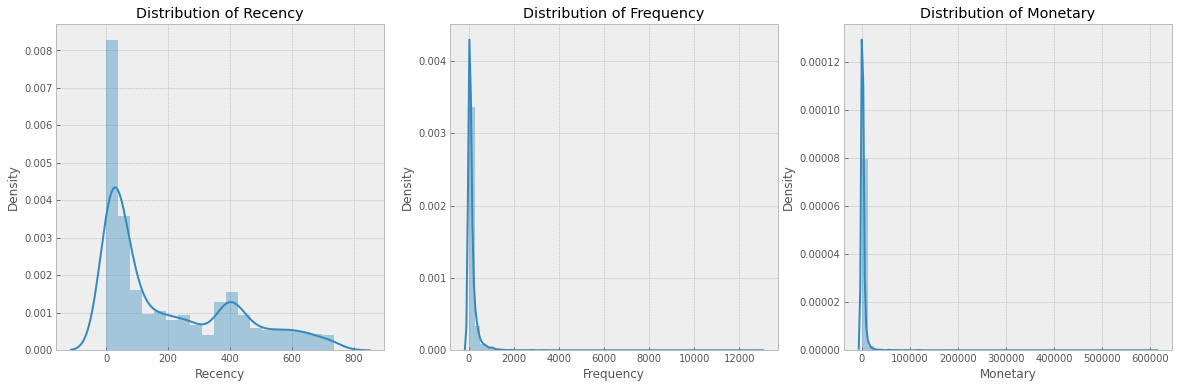

In [261]:
# Plot all 3 graphs together for summary findings
plt.figure(figsize=(20, 6))

plt.subplot(1, 3, 1), check_skew(data_rfm,'Recency')
plt.subplot(1, 3, 2), check_skew(data_rfm,'Frequency')
plt.subplot(1, 3, 3), check_skew(data_rfm,'Monetary')

plt.show()

Data sangat skewed, oleh karena itu, akan melakukan log transformationuntuk mengurangi kemiringan setiap variabel. Note: small constant is added to make positive value during transformation. Berikut adalah chart distribusi dari **Dataset RFM after log transformation**.

Recency's: Skew: -0.5568396931854902, : SkewtestResult(statistic=-15.562513995615191, pvalue=1.3085641700193527e-54)
Frequency's: Skew: -0.026345892263202744, : SkewtestResult(statistic=-0.7869377626820042, pvalue=0.43131830019691353)
Monetary's: Skew: 0.24707934748451743, : SkewtestResult(statistic=7.273588966059623, pvalue=3.5006006238424183e-13)


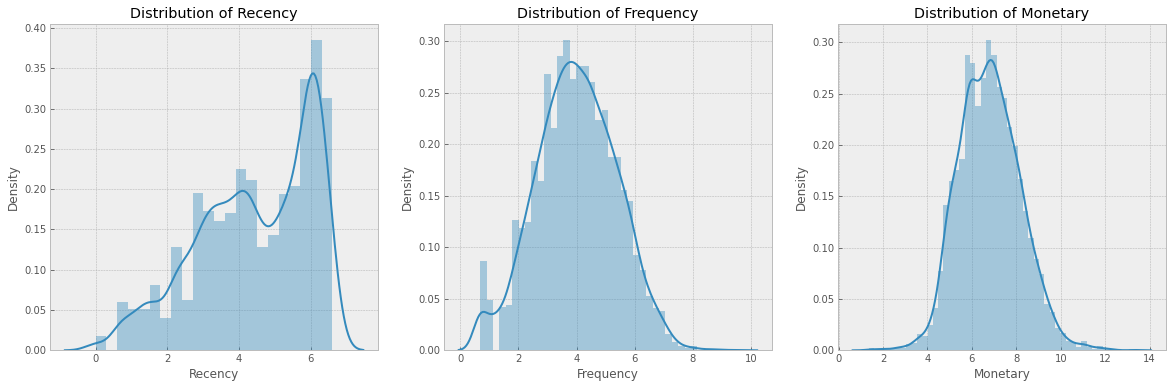

In [262]:
# Create copy of data_rfm
data_rfm_log = data_rfm.copy()

# Transforming dataset data_rfm_log into log
data_rfm_log = np.log(data_rfm_log+1)

# Plot all 3 graphs together for summary findings
plt.figure(figsize=(20, 6))

plt.subplot(1, 3, 1), check_skew(data_rfm_log,'Recency')
plt.subplot(1, 3, 2), check_skew(data_rfm_log,'Frequency')
plt.subplot(1, 3, 3), check_skew(data_rfm_log,'Monetary')

plt.show()

In [263]:
# # in case we would like to switch scheme without log transformation
# data_rfm = data_rfm_log

## D4. Handling Outlier

K Means will be used! Notes : K-means memberikan hasil terbaik dalam kondisi jika distribusi data terbebas dari outliers. Semua feature dari RFM dataset adalah numerical, demikian semua feature akan dilakukan pengecekan sekwness.

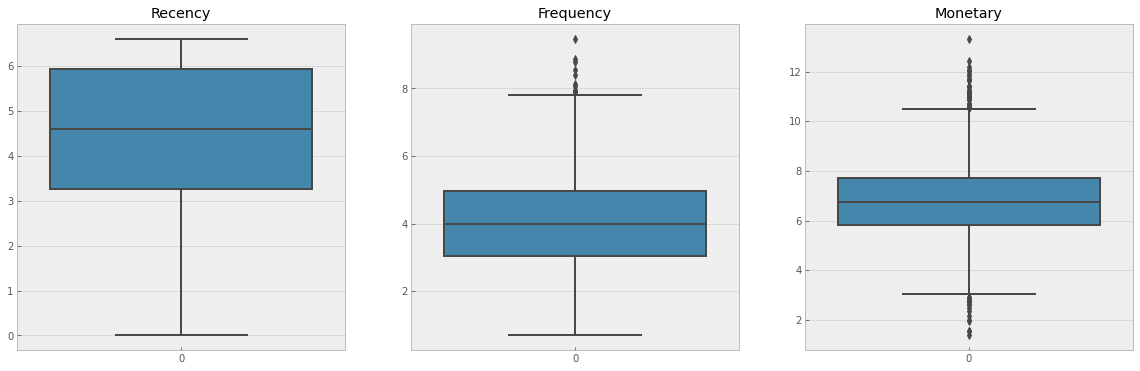

In [264]:
# Define list of column name
num_columns = data_rfm.select_dtypes(include=np.number).columns.tolist()

# # Create chart for loop
# plt.figure(figsize=(18, 6))
# for i,v in zip(range(len(num_columns)), num_columns):
#     plt.subplot(1, 3, i+1), sns.boxplot(data=data_rfm[v]), plt.title(v)

# Create chart for loop
plt.figure(figsize=(20, 6))
for i,v in zip(range(len(num_columns)), num_columns):
    plt.subplot(1, 3, i+1), sns.boxplot(data=data_rfm_log[v]), plt.title(v)

# set the spacing between subplots
plt.subplots_adjust(hspace=0.3)
plt.show()

In [265]:
# Define dataframe with outliers only and compute the skew
pd.DataFrame(data_rfm_log.skew(axis=0), columns=['skewness']).sort_values(by='skewness', ascending=True).T

,Recency,Frequency,Monetary
skewness,-0.556996,-0.026353,0.247149


Teknik outliers handling, windsorizer, dipilih karena semua data outliers ini diasumsikan legitimate (bukan noise yang harus kita drop datanya), demikian kita adjust data outliers ini ke batas atas dan bawahnya sehingga semua informasi dari data tetap dapat diperhitungkan oleh model Machine Learning. Adapun karena dsitribusi data dari semua feature adalah skew, maka formula outliers handling yang digunakan adalah windsorizer IQR fold 3, tail both. Recency: Skew (skewness di antara 0.5 sd 1 atau -0.5 sd -1). Frequency & Monetary : Extrem Skew (skewness > 1 atau < -1).

In [266]:
# Create the capper | Skewness : skew
windsoriser_skew = Winsorizer(capping_method='iqr', tail='both', fold=1.5, # all features skew
                          variables=['Recency'])

windsoriser_skew.fit(data_rfm_log)
data_rfm_log = windsoriser_skew.transform(data_rfm_log)

# # Create the capper | Skewness : extreme skew
# windsoriser_eskew = Winsorizer(capping_method='iqr', tail='both', fold=1.5, # all features extreme skew
#                           variables=['Frequency', 'Monetary'])

# windsoriser_eskew.fit(data_rfm_log)
# data_rfm_log = windsoriser_eskew.transform(data_rfm_log)

# Create the capper | Skewness : normal
windsoriser_normal = Winsorizer(capping_method='gaussian', tail='both', fold=2, # all features normal
                          variables=['Frequency', 'Monetary'])

windsoriser_normal.fit(data_rfm_log)
data_rfm_log = windsoriser_normal.transform(data_rfm_log)

Let's see our boxplot after outliers has been handled.

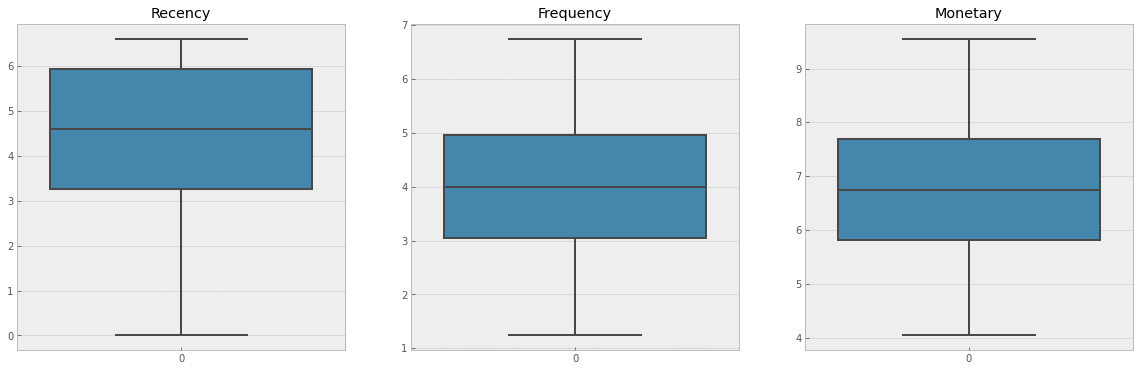

In [267]:
# Create chart for loop
plt.figure(figsize=(20, 6))
for i,v in zip(range(len(num_columns)), num_columns):
    plt.subplot(1, 3, i+1), sns.boxplot(data=data_rfm_log[v]), plt.title(v)

# set the spacing between subplots
plt.subplots_adjust(hspace=0.3)
plt.show()

**Outliers has been handled with windsorizer!**

# E. Feature Scaling with Pipeline

Bagian ini berisi proses scaling dataset menggunakan pipeline (plus columns transformer) serta proses fit dan transfromasi dari dataset tersebut yang kemudian akan disebut dengan dataset scaled : `data_rfm_scaled`.

In [268]:
# display all columns skewness
pd.set_option("display.max.columns",None)
pd.DataFrame(data_rfm_log.skew(axis=0), columns=['skewness']).T

,Recency,Frequency,Monetary
skewness,-0.556996,-0.019725,0.135227


**Pada case ini, algoritma scaling yang akan digunakan adalah StandardScaler. 1) karena overall feature adalah normal distribution dan 2) memudahkan proses komparasi visual cluster pada saat pembuatan snakeplot.**

Note: Berdasarkan masing-masing feature skewness, seharusnya setiap feature dengan skewness = skewed, proses scaling yang digunakan adalah MinMaxScaler (contoh: `Recency`), kemudian untuk feature dengan skewness = normal skew (contoh: `Frequency & Monetary`), maka proses scalingnya menggunakan StandardScaler.

In [269]:
# # Define columnn name for scaling and encoding
# numeric_features_mm = ['Recency']
# numeric_features_rb = ['Frequency', 'Monetary']
numeric_features_ss = ['Recency', 'Frequency', 'Monetary']

# # Define scaling and encoding technique
# numeric_transformer_mm = Pipeline([("scaler1", MinMaxScaler())])
# numeric_transformer_rb = Pipeline([("scaler2", RobustScaler())])
numeric_transformer_ss = Pipeline([("scaler3", StandardScaler())])

# # Define Transformer Column
preprocessor = ColumnTransformer(
    transformers=[
        # ("num1", numeric_transformer_mm, numeric_features_mm),
        ("num2", numeric_transformer_ss, numeric_features_ss)
        # ("num3", numeric_transformer_rb, numeric_features_rb)
    ]
)

In [270]:
# Feature Scaling
preprocessor.fit(data_rfm_log)
# Transform data RFM
data_rfm_scaled = preprocessor.transform(data_rfm_log)
data_rfm_scaled

array([[ 0.84230017, -0.33079253,  2.11921345],
       [ 0.97831377, -0.87400957, -0.5776557 ],
       [ 1.09388511, -0.64662247, -0.15329488],
       ...,
       [ 1.28537235, -1.07580788, -0.55730298],
       [ 1.08088006,  0.16881347,  0.29314635],
       [-0.42744856,  0.79343286,  1.19103488]])

# F. RMF Segmenting

Bagian ini berisi tentang simulasi jumlah K optimal untuk improvisasi model machine learning unsupervised (into supervised) vs best practice jumlah segmentasi customer versi dari RFM. Setelah dilakukan segmentasi (based on RFM), proses selanjutnya adalah proses conversi RFM value into rank, kemudian dilanjutkan konversi RFM rank into Customer segment (sumber: clevertap.com, learn.g2.com) dengan deskipsi actionable insight untuk setiap customer segment.

## F1. Simulate Segmentation amount of K

In [271]:
# Define Kmean model with K (trial) 1 sd n
k_value = 12  # Define k = 12
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(data_rfm_scaled)
                for k in range(1, k_value)]

# Measure inersia
inertias = [model.inertia_ for model in kmeans_per_k]
print('Nilai inersia untuk k 1 sd', k_value, ':', inertias)

Nilai inersia untuk k 1 sd 12 : [16020.000000000005, 7887.850208132213, 5927.4374277041425, 4669.694200957678, 3958.8104786658378, 3482.65868991753, 3087.8591862804865, 2821.5025696425814, 2638.1865004086517, 2469.1843669213445, 2300.548267424797]


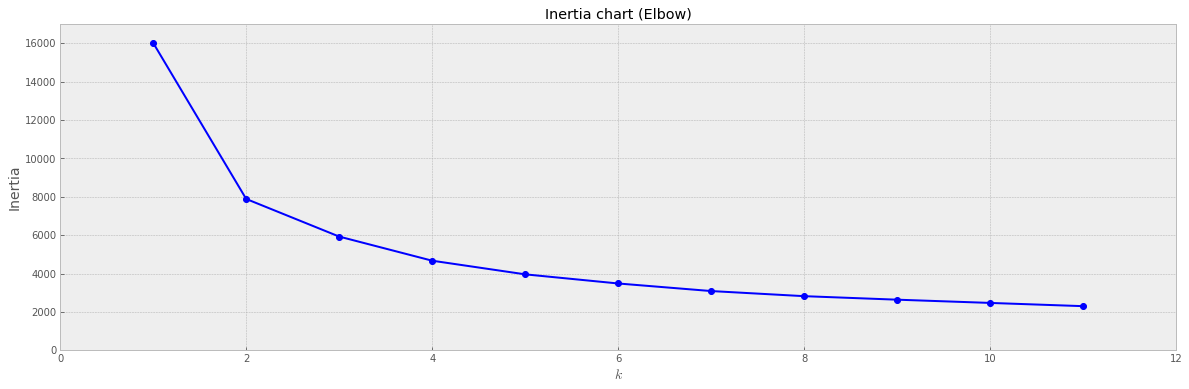

In [272]:
# Create chart inertia (lihat yg paling patah)
plt.figure(figsize=(20, 6))
plt.plot(range(1, k_value), inertias, "bo-")
plt.title('Inertia chart (Elbow)')
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.axis([0, 12, 0, 17000])
plt.show()

Berdasarkan elbow method, cluster terbaik untuk perfoma model berada pada k = 2 (optimal number of cluster). Namun dalam case RFM ini, jumlah cluster dengan k terbanyak dan proporsional lah yang justru ingin kita identifikasi. Semakin banyak jumlah cluster RFM yang bisa kita temukan, makan semakin tajam segmentasi customer yang bisa kita lakukan (analisi lebih tepat serta insight action yang lebih terarah bagi tim sales dan marketing). Demikian, snake plot akan dilakukan pada bagian selanjutnya!

## F2. RMF Segmenting

Pada bagian ini berisi 2 pembahasan. 1) Hasil simulasi visualisasi dari beberapa proses clustering / segmentation untuk scheme k menggunakan scatter plot (dimension has been reduce with PCA into 2 dimension). 2) Hasil simulasi visualisasi yang sama menggunakan snakeplot untuk melihat separasi antar scheme k pada value Recency, Frequency, Monetary.

### - K Scheme with scatterplot

In [273]:
def compute_kmeans(normalised_df_rfm, clusters_number, original_df_rfm):
    
    kmeans = KMeans(n_clusters = clusters_number, random_state = 1)
    kmeans.fit(normalised_df_rfm)

    # Extract cluster labels
    cluster_labels = kmeans.labels_

    # Create a cluster label column in original dataset
    df_new = data_rfm.assign(Segmentation = cluster_labels)
    
    # Transform X_reduce into 2D
    model = PCA(n_components=2)
    transformed = model.fit_transform(data_rfm_scaled)

    # Plot t-SNE
    plt.title('Flattened Graph of {} Clusters'.format(clusters_number))
    sns.scatterplot(x=transformed[:,0], y=transformed[:,1], hue=cluster_labels, style=cluster_labels, palette="viridis")
    
    return df_new

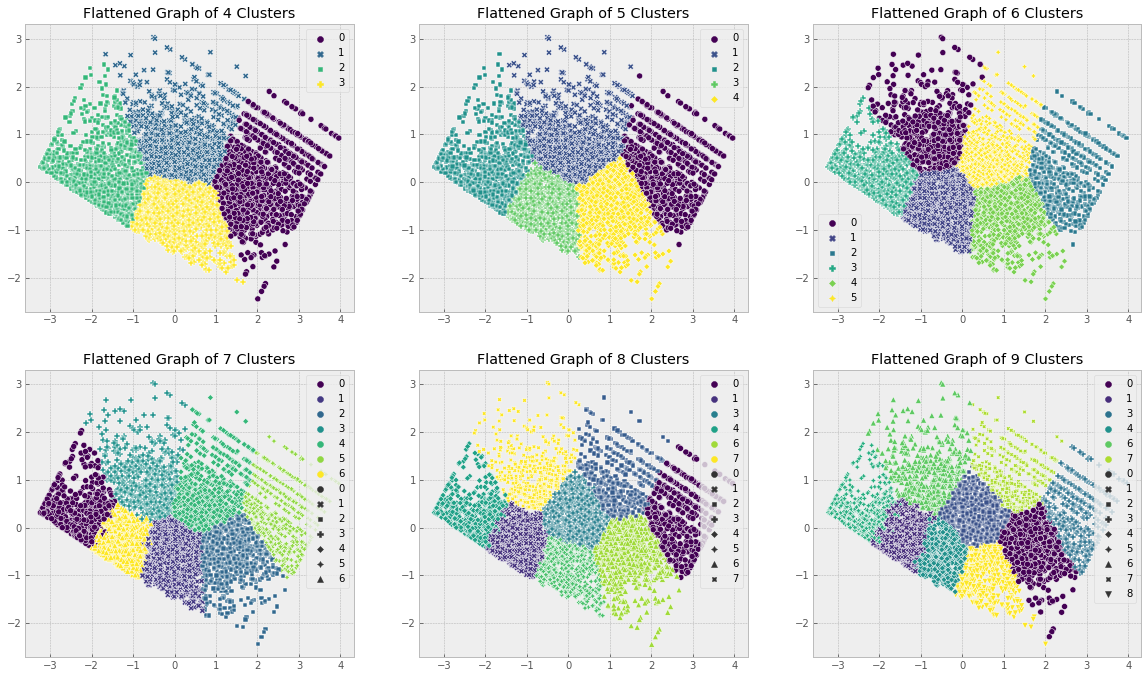

In [274]:
plt.figure(figsize=(20, 18))

plt.subplot(3, 3, 1)
data_rfm_k4 = compute_kmeans(data_rfm_scaled, 4, data_rfm)
plt.subplot(3, 3, 2)
data_rfm_k5 = compute_kmeans(data_rfm_scaled, 5, data_rfm)
plt.subplot(3, 3, 3)
data_rfm_k6 = compute_kmeans(data_rfm_scaled, 6, data_rfm)
plt.subplot(3, 3, 4)
data_rfm_k7 = compute_kmeans(data_rfm_scaled, 7, data_rfm)
plt.subplot(3, 3, 5)
data_rfm_k8 = compute_kmeans(data_rfm_scaled, 8, data_rfm)
plt.subplot(3, 3, 6)
data_rfm_k9 = compute_kmeans(data_rfm_scaled, 9, data_rfm)

plt.show()

Dari hasil visualisasi, overall tidak ada data yang overlap antara satu segmentasi dengan segmentasi lainnya (K Means looks just fine for all K scheme, k with the amount of 4 to 9 look fine and clustered nicely). However, masih belum bisa dilihat secara jelas overlap-nya secara amount --> Lets use Snakeplot!

### - K Scheme with snakeplot

In [275]:
def snake_plot(normalised_df_rfm, df_rfm_kmeans, df_rfm_original):

    normalised_df_rfm = pd.DataFrame(normalised_df_rfm, 
                                       index=data_rfm.index, 
                                       columns=data_rfm.columns)
    normalised_df_rfm['Segmentation'] = df_rfm_kmeans['Segmentation']

    # Melt data into long format
    df_melt = pd.melt(normalised_df_rfm.reset_index(), 
                        id_vars=['Segmentation'],
                        value_vars=['Recency', 'Frequency', 'Monetary'], 
                        var_name='Metric', 
                        value_name='Value')

    plt.xlabel('Metric')
    plt.ylabel('Value')
    sns.pointplot(data=df_melt, x='Metric', y='Value', hue='Segmentation')
    
    return

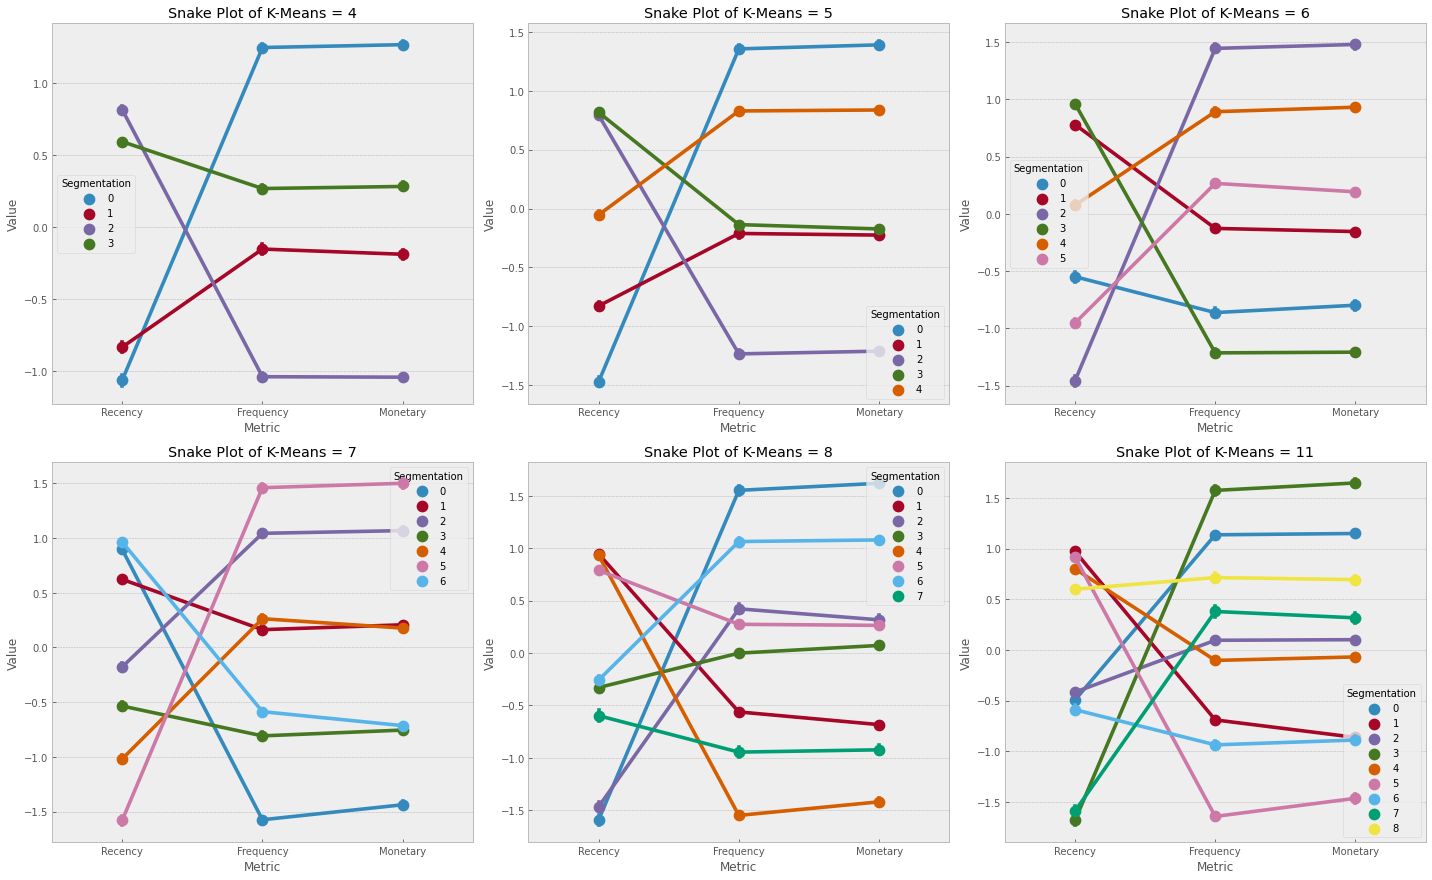

In [276]:
plt.figure(figsize=(20, 18))

plt.subplot(3, 3, 1), plt.title('Snake Plot of K-Means = 4')
snake_plot(data_rfm_scaled, data_rfm_k4, data_rfm)
plt.subplot(3, 3, 2), plt.title('Snake Plot of K-Means = 5')
snake_plot(data_rfm_scaled, data_rfm_k5, data_rfm)
plt.subplot(3, 3, 3), plt.title('Snake Plot of K-Means = 6')
snake_plot(data_rfm_scaled, data_rfm_k6, data_rfm)
plt.subplot(3, 3, 4), plt.title('Snake Plot of K-Means = 7')
snake_plot(data_rfm_scaled, data_rfm_k7, data_rfm)
plt.subplot(3, 3, 5), plt.title('Snake Plot of K-Means = 8')
snake_plot(data_rfm_scaled, data_rfm_k8, data_rfm)
plt.subplot(3, 3, 6), plt.title('Snake Plot of K-Means = 11')
snake_plot(data_rfm_scaled, data_rfm_k9, data_rfm)

plt.tight_layout()

Berdasarkan snakeplot, maka dapat disimpukan bahwa jumlah k = 6 adalah yang paling tepat untuk diterapkan dalam RFM analysis karena 1) setiap value dari each k untuk masing-masing Recency, Freq, dan Monetary terlihat tidak bertumpuk terlalu rapat, 2) jumlah k terbanyak yang bisa didapatkan dari keseluruhan scheme of k (the more the cluster we get from RFM, the better the segmentation for sales and marketing, `source: salesforce, United Tractors Tbk, prospectsoft & CleverTap`).

### - Define final Pipeline for Scaling & KMeans model

In [277]:
# backup file for cintingency
data_rfm_optimum = data_rfm_k6.copy()

In [278]:
# Define final clustering model
model_kmeans_pipe = Pipeline([('preprocessing', preprocessor),
                            ("classifier", KMeans(n_clusters = 6, random_state = 1))])
model_kmeans_pipe.fit(data_rfm_log)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num2',
                                                  Pipeline(steps=[('scaler3',
                                                                   StandardScaler())]),
                                                  ['Recency', 'Frequency',
                                                   'Monetary'])])),
                ('classifier', KMeans(n_clusters=6, random_state=1))])

Final Pipeline `model_kmeans_pipe` untuk proses deployment is ready!

## F3. Define RFM Score

In [279]:
# Group dataframe by segmentation

 # =======  !!! The key for RFM ranking = Mean/Median show the same result of segmentation
data_rfm_optimum_groupby_median = data_rfm_optimum.groupby('Segmentation').median() # Preference Skewed data --> Median
 # =======  !!! The key for RFM ranking = Mean/Median show the same result of segmentation

# Create new column of segmentation freq
data_rfm_optimum_groupby_freq = data_rfm_optimum.Segmentation.value_counts()
# Concat both dataframe
data_rfm_optimum_groupby = pd.concat([data_rfm_optimum_groupby_median, data_rfm_optimum_groupby_freq], axis=1)
data_rfm_optimum_groupby

# Group dataframe by segmentation
# data_rfm_optimum_groupby = data_rfm_optimum.groupby('Segmentation').mean()
# data_rfm_optimum_groupby

,Recency,Frequency,Monetary,Segmentation
0,41.0,18.0,331.330,574
1,366.0,45.0,715.145,1310
2,8.5,371.0,6150.415,672
3,430.0,11.0,185.060,1071
4,84.0,176.0,2818.840,846
5,21.0,76.0,1107.460,867


In [280]:
chosen_k = 6
data_rfm_optimum_groupby['R_Score'] = ((data_rfm_optimum_groupby['Recency'].rank(ascending=False))*5/chosen_k).round().astype(int)
data_rfm_optimum_groupby['F_Score'] = ((data_rfm_optimum_groupby['Frequency'].rank(ascending=True))*5/chosen_k).round().astype(int)
data_rfm_optimum_groupby['M_Score'] = ((data_rfm_optimum_groupby['Monetary'].rank(ascending=True))*5/chosen_k).round().astype(int)
data_rfm_optimum_groupby.sort_values(['Recency'])

,Recency,Frequency,Monetary,Segmentation,R_Score,F_Score,M_Score
2,8.5,371.0,6150.415,672,5,5,5
5,21.0,76.0,1107.460,867,4,3,3
0,41.0,18.0,331.330,574,3,2,2
4,84.0,176.0,2818.840,846,2,4,4
1,366.0,45.0,715.145,1310,2,2,2
3,430.0,11.0,185.060,1071,1,1,1


In [281]:
data_rfm_optimum_groupby['RFM_score'] = data_rfm_optimum_groupby.R_Score.map(str)+data_rfm_optimum_groupby.F_Score.map(str)+data_rfm_optimum_groupby.M_Score.map(str)
# data_rfm_optimum_groupby = data_rfm_optimum_groupby.drop(columns=['R_Score','F_Score','M_Score'])
data_rfm_optimum_groupby

,Recency,Frequency,Monetary,Segmentation,R_Score,F_Score,M_Score,RFM_score
0,41.0,18.0,331.330,574,3,2,2,322
1,366.0,45.0,715.145,1310,2,2,2,222
2,8.5,371.0,6150.415,672,5,5,5,555
3,430.0,11.0,185.060,1071,1,1,1,111
4,84.0,176.0,2818.840,846,2,4,4,244
5,21.0,76.0,1107.460,867,4,3,3,433


**RFM score has been created!**

## F4. Define Customer Segment Name & Insight

Berikut pendefinisian RFM Score into Customer Segmentation & its Actionable insight **BASED ON R-F-M VALUE INTO RFM SCORE**. Source: **CleverTap & Prospectsoft** --> CleverTap: Well known organization (specialising in CRM & eCommerce), SaaS based customer lifecycle management and mobile marketing company which provides mobile app analytics and user engagement products to 4,000 clients.

In [282]:
# Create mapping for correlate RFM Score with real customer segmentation name
seg_map = {
    r'11[1-5]': 'Lost',
    r'[1-2][1-2][1-5]': 'Hibernating',
    r'[1-2][3-4][1-5]': 'At Risk',
    r'[1-2]5[1-5]': 'Cant Loose Them',
    r'3[1-2][1-5]': 'About to Sleep',
    r'33[1-5]': 'Need Attention',
    r'[3-4][4-5][1-5]': 'Loyal Customers',
    r'41[1-5]': 'Promising',
    r'51[1-5]': 'New Customers',
    r'[4-5][2-3][1-5]': 'Potential Loyalists',
    r'5[4-5][1-5]': 'Champions'
}

# Create new columns for customer segmentation based on seg_map
data_rfm_optimum_groupby['RFM_name_validation'] = data_rfm_optimum_groupby.RFM_score.replace(seg_map, regex=True)

# copy dataframe for treemap
df_treemap = data_rfm_optimum_groupby.copy()
data_rfm_optimum_groupby

,Recency,Frequency,Monetary,Segmentation,R_Score,F_Score,M_Score,RFM_score,RFM_name_validation
0,41.0,18.0,331.330,574,3,2,2,322,About to Sleep
1,366.0,45.0,715.145,1310,2,2,2,222,Hibernating
2,8.5,371.0,6150.415,672,5,5,5,555,Champions
3,430.0,11.0,185.060,1071,1,1,1,111,Lost
4,84.0,176.0,2818.840,846,2,4,4,244,At Risk
5,21.0,76.0,1107.460,867,4,3,3,433,Potential Loyalists


In [283]:
# Create for loop for df into RFM Result + actionable insight

def add_segment_action(df, column_name):
    j = range(len(df))
    segment_desc = []
    action_desc = []

    for i in j:
        if df[column_name][i] == 'Champions':
            segment_desc.append('Bought recently, buy often, & spend the most')
            action_desc.append('Reward them, likely to be early adopters of a new product, they will promote your brand')
        elif df[column_name][i] == 'Loyal Customers':
            segment_desc.append('Spend good money with us often & are responsive to promotions')
            action_desc.append('Upsell higher value products, ask for reviews, engage them')
        elif df[column_name][i] == 'Potential Loyalists':
            segment_desc.append('Recent customer but spending a good amount & have bought more than once')
            action_desc.append('Offer membership or loyalty programs, recommend other products to them')
        elif df[column_name][i] == 'New Customers':
            segment_desc.append('Bought more recently, but dont purchase often')
            action_desc.append('provide onboard support, give them early success, and start building a relationship')
        elif df[column_name][i] == 'Promising':
            segment_desc.append('Recent shoppers but havent spent much')
            action_desc.append('create brand awareness, offer a fee product sample')
        elif df[column_name][i] == 'Need Attention':
            segment_desc.append('Above average recently, frequency, & monetary values - will lose them of not reactivated')
            action_desc.append('make limited-time offers, recommend a product to them based on past purchases, reactivate them')
        elif df[column_name][i] == 'About to Sleep':
            segment_desc.append('Below average recently, frequency & monetary values - will lose them of not reactivated')
            action_desc.append('Share valuable resources, recommend a popular product at discount, and reconnect with them')
        elif df[column_name][i] == 'At Risk':
            segment_desc.append('Spent big money and purchased often but havent purchased for a long time')
            action_desc.append('Send personalized emails to reconnect, offer discounts, and provide a helpful resource')
        elif df[column_name][i] == 'Cant Loose Them':
            segment_desc.append('Made biggest purchases frequently but havent purchased for a long time')
            action_desc.append('Win the back with a newer product, dont lose them to competition, talk to them')
        elif df[column_name][i] == 'Hibernating':
            segment_desc.append('Last purchase was long back - these are low spenders who have placed few orders')
            action_desc.append('Offer other relevant products and special discounts, recreate brand value')        
        else:
            segment_desc.append('Lowest recency, frequency, & monetary scores')
            action_desc.append('Revive interest with reach out campaign, ignore them')   

    segment_desc_pd = pd.DataFrame(segment_desc, columns=['RFM_desc'])
    action_desc_pd = pd.DataFrame(action_desc, columns=['RFM_action'])

    # Concate between Inference-Set and Rating's Prediction
    df = pd.concat([df, segment_desc_pd, action_desc_pd], axis=1)

    return df

In [284]:
# Concate between Inference-Set and Rating's Prediction
data_rfm_optimum_groupby_complete = add_segment_action(data_rfm_optimum_groupby, 'RFM_name_validation')
data_rfm_optimum_groupby_complete.drop(columns=['R_Score','F_Score','M_Score','RFM_score'],inplace=True)
data_rfm_optimum_groupby_complete

,Recency,Frequency,Monetary,Segmentation,RFM_name_validation,RFM_desc,RFM_action
0,41.0,18.0,331.330,574,About to Sleep,"Below average recently, frequency & monetary v...","Share valuable resources, recommend a popular ..."
1,366.0,45.0,715.145,1310,Hibernating,Last purchase was long back - these are low sp...,Offer other relevant products and special disc...
2,8.5,371.0,6150.415,672,Champions,"Bought recently, buy often, & spend the most","Reward them, likely to be early adopters of a ..."
3,430.0,11.0,185.060,1071,Lost,"Lowest recency, frequency, & monetary scores","Revive interest with reach out campaign, ignor..."
4,84.0,176.0,2818.840,846,At Risk,Spent big money and purchased often but havent...,"Send personalized emails to reconnect, offer d..."
5,21.0,76.0,1107.460,867,Potential Loyalists,Recent customer but spending a good amount & h...,"Offer membership or loyalty programs, recommen..."


**Segmentation based on group of customer has been created!**

## F5. Create Complete Customer Segmentation

Since the customer segmentation name, segmentation description, and its actionable has been all defined by segmentaion group in the previous section. Now its time to correlate the result with Cust ID dataset, so you can look up Cust ID by their segmentation and all the RFM detail!

In [285]:
# Re-Adding Customer ID with RFM optimum
data_rfm_optimum = pd.concat([data_rfm_raw['Customer ID'], data_rfm_optimum], axis=1)
# Show concat result
data_rfm_optimum

,Customer ID,Recency,Frequency,Monetary,Segmentation
0,12346.0,325,34,77556.46,4
1,12608.0,404,16,415.79,3
2,12745.0,486,22,723.85,1
3,12746.0,540,17,254.55,3
4,12747.0,2,257,9276.54,2
...,...,...,...,...,...
5335,18283.0,3,986,2736.65,2
5336,18284.0,431,28,461.68,1
5337,18285.0,660,12,427.00,3
5338,18286.0,476,67,1296.43,1


In [286]:
# Create for loop for data_rfm_cluster into RFM Result
def add_segment_name(df, column_name):
    m = range(len(df))

    name_desc = []

    for i in m:
        if df[column_name][i] == 0:
            name_desc.append('About to Sleep')
        elif df[column_name][i] == 1:
            name_desc.append('Hibernating')
        elif df[column_name][i] == 2:
            name_desc.append('Champions')
        elif df[column_name][i] == 3:
            name_desc.append('Lost')
        elif df[column_name][i] == 4:
            name_desc.append('At Risk')
        else:
            name_desc.append('Potential Loyalists')

    name_desc_pd = pd.DataFrame(name_desc, columns=['RFM_name'])

    # Concate between Inference-Set and Rating's Prediction
    df = pd.concat([df, name_desc_pd], axis=1)
    
    return df

In [287]:
# Concate between Inference-Set and Rating's Prediction
data_rfm_with_segment = add_segment_name(data_rfm_optimum, 'Segmentation')
data_rfm_with_segment

,Customer ID,Recency,Frequency,Monetary,Segmentation,RFM_name
0,12346.0,325,34,77556.46,4,At Risk
1,12608.0,404,16,415.79,3,Lost
2,12745.0,486,22,723.85,1,Hibernating
3,12746.0,540,17,254.55,3,Lost
4,12747.0,2,257,9276.54,2,Champions
...,...,...,...,...,...,...
5335,18283.0,3,986,2736.65,2,Champions
5336,18284.0,431,28,461.68,1,Hibernating
5337,18285.0,660,12,427.00,3,Lost
5338,18286.0,476,67,1296.43,1,Hibernating


In [288]:
data_rfm_complete = add_segment_action(data_rfm_with_segment, 'RFM_name')
data_rfm_complete.head()

,Customer ID,Recency,Frequency,Monetary,Segmentation,RFM_name,RFM_desc,RFM_action
0,12346.0,325,34,77556.46,4,At Risk,Spent big money and purchased often but havent...,"Send personalized emails to reconnect, offer d..."
1,12608.0,404,16,415.79,3,Lost,"Lowest recency, frequency, & monetary scores","Revive interest with reach out campaign, ignor..."
2,12745.0,486,22,723.85,1,Hibernating,Last purchase was long back - these are low sp...,Offer other relevant products and special disc...
3,12746.0,540,17,254.55,3,Lost,"Lowest recency, frequency, & monetary scores","Revive interest with reach out campaign, ignor..."
4,12747.0,2,257,9276.54,2,Champions,"Bought recently, buy often, & spend the most","Reward them, likely to be early adopters of a ..."


**Segmentaion based on Customer ID has been created!**

# G. Segmenting Evaluation

In [289]:
# Find Percentage
df_treemap['Percentage'] = round(100 * df_treemap["Segmentation"] / sum(df_treemap["Segmentation"]), 2)
# df_treemap.drop(columns=['R_Score','F_Score','M_Score','RFM_score'],inplace=True)
df_treemap["Label"] = df_treemap["RFM_name_validation"] + " (" + df_treemap["Percentage"].astype("str") + "%)"
df_treemap

,Recency,Frequency,Monetary,Segmentation,R_Score,F_Score,M_Score,RFM_score,RFM_name_validation,Percentage,Label
0,41.0,18.0,331.330,574,3,2,2,322,About to Sleep,10.75,About to Sleep (10.75%)
1,366.0,45.0,715.145,1310,2,2,2,222,Hibernating,24.53,Hibernating (24.53%)
2,8.5,371.0,6150.415,672,5,5,5,555,Champions,12.58,Champions (12.58%)
3,430.0,11.0,185.060,1071,1,1,1,111,Lost,20.06,Lost (20.06%)
4,84.0,176.0,2818.840,846,2,4,4,244,At Risk,15.84,At Risk (15.84%)
5,21.0,76.0,1107.460,867,4,3,3,433,Potential Loyalists,16.24,Potential Loyalists (16.24%)


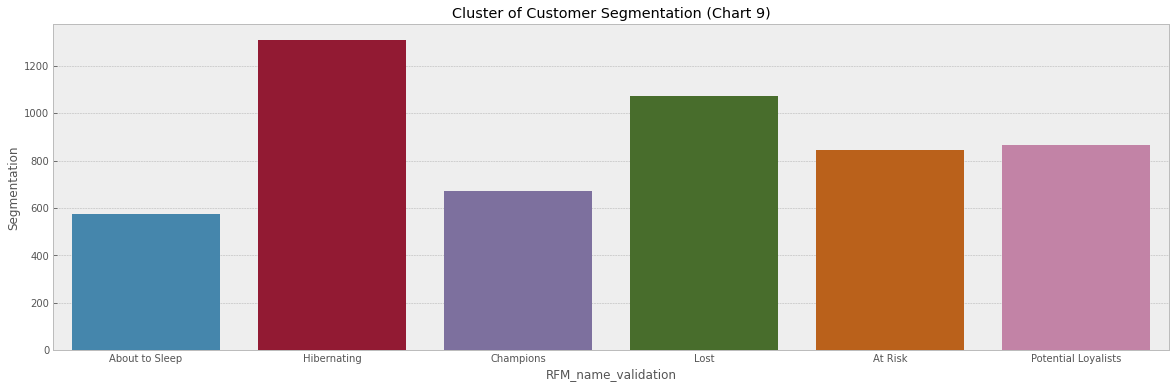

In [290]:
# Create Chart or Plot
plt.figure(figsize=(20, 6))
sns.barplot(x=df_treemap.RFM_name_validation, y=df_treemap.Segmentation, data=df_treemap)
plt.title("Cluster of Customer Segmentation (Chart 9)")
plt.xticks(rotation=0)
plt.show()

The Cluster of Customer Segmentation chart shows the number of customers for each segmentation. The highest number of customers is in the Hibernating segment (Last purchase was long back - these are low spenders who have placed few orders), then in second place is Lost Customer (Lowest recency, frequency, & monetary scores). Based on the level of risk & mitigation, Hibernating and Lost customers are the segmentation with the highest risk for loss of potential sales (bad news, they are most likely to stop buying the product from the shop). On the other hand, for the Champions segmentation (Bought recently, buy often, & spend the most) and Potential Loyalist (Recent customer but spending a good amount & have bought more than once), they help online stores in promoting the products they sell and help increase their sales. indirect store sales.

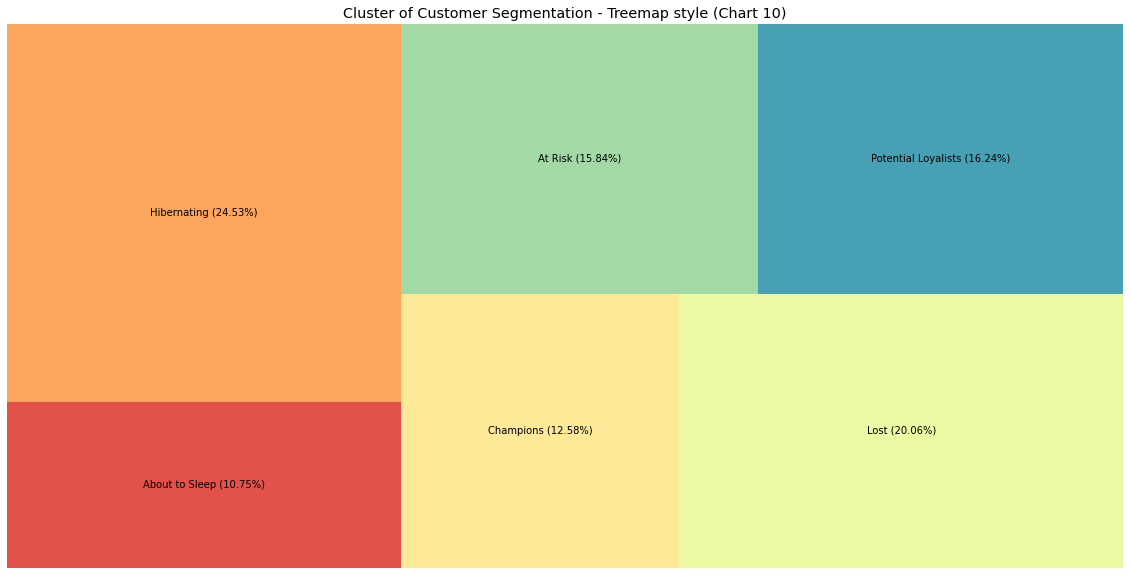

In [291]:
# Create Chart or Plot
plt.subplots(figsize=(20,10))
squarify.plot(sizes=df_treemap["Segmentation"], label=df_treemap["Label"], color=sns.color_palette("Spectral"))
plt.title("Cluster of Customer Segmentation - Treemap style (Chart 10)")
plt.axis('off')
fig.set_facecolor('white')

**Konversi visualisasi Cluster of Customer Segmentation into treemap done!** Lets proceed with more evaluasion.

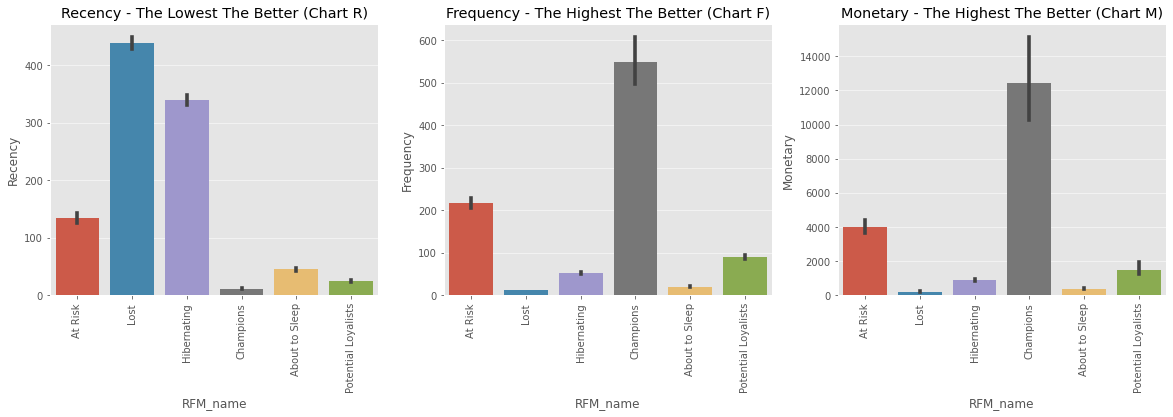

In [292]:
# Define plot style
plt.style.use('ggplot')

# Create Chart or Plot
plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
sns.barplot(x='RFM_name', y='Recency', data=data_rfm_complete)
plt.xticks(rotation=90)
plt.title('Recency - The Lowest The Better (Chart R)')

plt.subplot(1, 3, 2)
sns.barplot(x='RFM_name', y='Frequency', data=data_rfm_complete)
plt.title('Frequency - The Highest The Better (Chart F)')
plt.xticks(rotation=90)

plt.subplot(1, 3, 3)
sns.barplot(x='RFM_name', y='Monetary', data=data_rfm_complete)
plt.title('Monetary - The Highest The Better (Chart M)')
plt.xticks(rotation=90)

# set the spacing between subplots
plt.subplots_adjust(wspace=0.2)

plt.show()

To re-assure, whether the segmentation has performed well or has represented the entire data, it can be seen that the differences between the ON R-F-M based clusters are clear, or the differences can be seen clearly and according to the characters of RFM. For example, customer Champions segmentation based on recency (see Chart R) seems to have the lowest value which is true. And in terms of Freq and Monetary, Champions have the highest value among the other segments, which is visible on Charts F and M. This evaluation logic also applies to other categories.

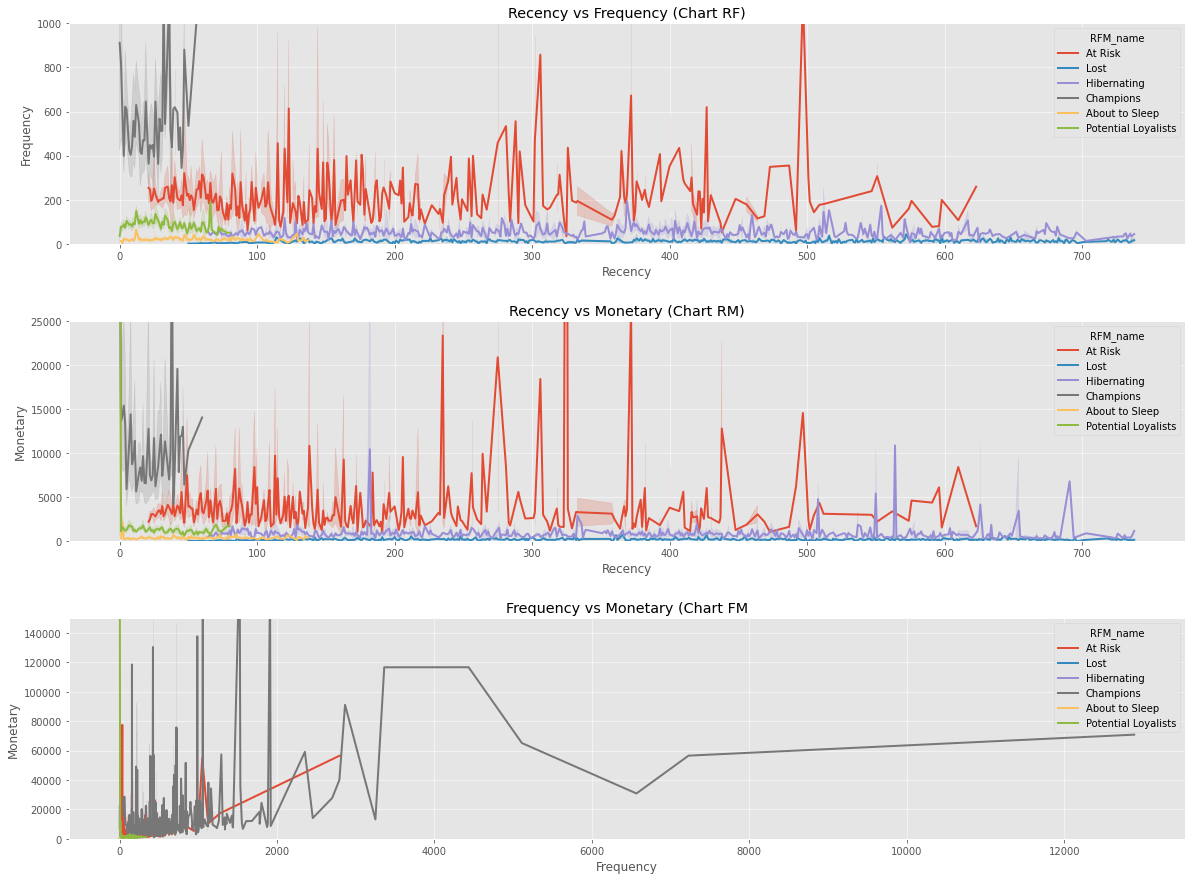

In [293]:
# Define plot style
plt.style.use('ggplot')

# Create Chart or Plot
plt.figure(figsize=(20, 15))

plt.subplot(3, 1, 1)
sns.lineplot(x='Recency', y='Frequency', hue='RFM_name', data=data_rfm_complete)
plt.title('Recency vs Frequency (Chart RF)')
plt.ylim(0, 1000)

plt.subplot(3, 1, 2)
sns.lineplot(x='Recency', y='Monetary', hue='RFM_name', data=data_rfm_complete)
plt.title('Recency vs Monetary (Chart RM)')
plt.ylim(0, 25000)

plt.subplot(3, 1, 3)
sns.lineplot(x='Frequency', y='Monetary', hue='RFM_name', data=data_rfm_complete)
plt.title('Frequency vs Monetary (Chart FM')
plt.ylim(0, 150000)

# set the spacing between subplots
plt.subplots_adjust(hspace=0.35)

plt.show()

From the chart above, it is clearer to see the segmentation divided by each other. For example, it is clearer that there is a GAP recency of the 0 recency value on Lost Customer (see RF Chart). For At Risk customers, it can be seen that the frequency is quite explosive on several days as long as the dataset (RF Chart) has a large monetary value (RM Chart), but the recency is quite high. So the store can be sure to lose if the online store doesn't do anything to them.

`“80% of your sales come from 20% of your customers."` Pareto Principle. **you're in business largely because of the support of a fraction of your customer base: your best customers.** Based on this principle, So the priority of the online store in this case is to immediately approach customers more, whether they are already best customers (Champions & Loyal) or the other way around (At Risk, Hibernate or Lost Customer). What should be done?

Here are some strategies and actionable insights that this online store can do.

**Champions** --> Reward them, likely to be early adopters of a new product, they will promote your brand.

**Potential Loyalists** --> Offer membership or loyalty programs, recommend other products to them.

**About to Sleep** --> Share valuable resources, recommend a popular product at discount, and reconnect with them.

**At Risk** --> Send personalized emails to reconnect, offer discounts, and provide a helpful resource.

**Hibernating** --> Offer other relevant products and special discounts to recreate brand value.

**Lost Customer** --> Revive interest with reach out campaign, ignore them.

# H. Model Saving

In [294]:
# Save the Files
with open('model_kmeans_pipe.pkl', 'wb') as file_1:
  pickle.dump(model_kmeans_pipe, file_1)

# I. Inferencing

In [295]:
# transforming data inf into log
data_rfm_inf_log = np.log(data_rfm_inf+1)
# predict segmentation of dataset
data_rfm_inf_segment = model_kmeans_pipe.predict(data_rfm_inf_log)
# create dataframe of prediction result
df_data_rfm_inf_segment = pd.DataFrame(data_rfm_inf_segment,columns=['Segmentation'])
# concate between inference and clustering result
df_final_inf = pd.concat([data_rfm_inf,df_data_rfm_inf_segment],axis=1)
# add segment name and actionable insight
df_final_inf = add_segment_name(df_final_inf, 'Segmentation')
df_final_inf = add_segment_action(df_final_inf, 'RFM_name')

In [296]:
df_final_inf

,Customer ID,Recency,Frequency,Monetary,Segmentation,RFM_name,RFM_desc,RFM_action
0,13037.0,138,232,3914.95,4,At Risk,Spent big money and purchased often but havent...,"Send personalized emails to reconnect, offer d..."
1,17004.0,46,70,2425.16,5,Potential Loyalists,Recent customer but spending a good amount & h...,"Offer membership or loyalty programs, recommen..."
2,12928.0,35,179,4304.89,4,At Risk,Spent big money and purchased often but havent...,"Send personalized emails to reconnect, offer d..."
3,17304.0,534,5,111.50,3,Lost,"Lowest recency, frequency, & monetary scores","Revive interest with reach out campaign, ignor..."
4,14318.0,460,9,158.02,3,Lost,"Lowest recency, frequency, & monetary scores","Revive interest with reach out campaign, ignor..."
5,16338.0,157,11,214.80,3,Lost,"Lowest recency, frequency, & monetary scores","Revive interest with reach out campaign, ignor..."
6,17519.0,17,222,5109.47,2,Champions,"Bought recently, buy often, & spend the most","Reward them, likely to be early adopters of a ..."
7,14251.0,1,78,2879.70,5,Potential Loyalists,Recent customer but spending a good amount & h...,"Offer membership or loyalty programs, recommen..."
8,14871.0,3,201,1258.97,5,Potential Loyalists,Recent customer but spending a good amount & h...,"Offer membership or loyalty programs, recommen..."
9,17137.0,416,176,1133.63,1,Hibernating,Last purchase was long back - these are low sp...,Offer other relevant products and special disc...


Customer segmentaion with Inference data has been created just fine and complete.

# J. Conclusion

RFM & Clustering Model Conclusion

Membuat Segmentasi Customer menggunakan RFM analysis dengan tools Machine Learning K-Means berhasil dilakukan dengan hasil clustering yang clear dan impactful. Machine Learning K-Means pada dasarnya digunakan untuk memudahkan & mempercepat proses calculasi segmentasi (automasi machine learning), serta memungkinkan seorang data science untuk bekerja dengan lebih dari 1 juta data (yang tidak bisa dilakukan menggunakan excel). Selain itu, segmentasi yang dihasilkan lebih proper secara statistik, karena machine learning melihat internal similirity feature RFM secara optimal (pattern dari features) yang tidak bisa dilakukan hanya menggunakan Excel based biasa (yang hanya sekadar menggunakan teknik quartil pada saat konversi nilai RFM value into score). Adapun pada case ini, secara umum distribusi data after dimensi direduksi menjadi 2D (after PCA has been done), terlihat bahwa kerapatan dari dataset cukup padat dan merata, oleh karena itu lah KMeans digunakan untuk tetap dapat membagi dataset yang rapat dan merata tersebut ke dalam beberapa cluster. Jika algoritma lain seperti DBScan dan Spectral digunakan, maka hasil clustering tidak akan sesuai dengan konsep dari RFM itu sendiri (which is micro segmentation). Atas beberapa advantages tersebut K Means juga memiliki disadvantages, yaitu kurang performnya model jika dataset yang digunakan skewed dan standar deviasi yang kurang baik. Untuk mengatasi hal tersebut, log transformation pada dataset RFM perlu dilakukan sehingga penentuan K terbaik untuk RFM dapat lebih mudah untuk ditentukan (menggunakan PCA scatterplot & snakeplot). Dari hasil simulasi K, maka diperoleh nilai K terbaik, yaitu 6. Hasil evaluasi menunjukkan bahwa hasil clustering clear and very well devided between customer segmentation. Ke enam segmentasi tersebut adalah **Champions**, **Potential Loyalists**, **About to Sleep**, **At Risk**, **Hibernating**, serta **Lost Customer** + additional detail dan actionable insight.